<a href="https://colab.research.google.com/github/rhehgus02/ESAA/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EC%99%84%EB%B2%BD_%EA%B0%80%EC%9D%B4%EB%93%9C(13)_%ED%9A%8C%EA%B7%80(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **4. 사이킷런 LinearRegression을 이용한 보스턴 주택 가격 예측**

* 사이킷런의 `linear_models` 모듈: 매우 다양한 종류의 선형 기반 회귀를 클래스로 구현해 제공 

---

### **4-1. LinearRegression 클래스 - Ordinary Least Squares**

*  `LinearRegression` 클래스: 예측값과 실제값의 RSS를 최소화해 OLS 추정 방식으로 구현한 클래스

    -> `fit()` 메서드로 X, y 배열을 입력 받으면 화귀 계수인 W를 `coef_` 속성에 저장

        class sklearn.linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)

* 입력 파라미터

    * `fit_intercept`: 절편 값을 계산할지 말지를 지정함, False로 지정되면 intercept가 사용되지 않고 0으로 지정(디폴트는 True)

    * `nolmalize`: `fit_intercept`가 False인 경우에는 이 파라미터가 무시되고 True일 경우에는 회귀를 수행하기 전에 데이터 세트를 정규화(디폴트는 False)

* 속성

    * `coef_`: fit() 메서드를 수행했을 때 회귀 계수를 배열 형태로 저장하는 속성, shape는 (target 값 개수, 피처 개수)

    * `intercept_`: intercept 값
     
* 다중 공산성 문제: 피처 간의 상관관계가 매우 높은 경우 분산이 매우 커져서 오류에 매우 민감해지는 것

    -> 상관관계가 높은 피처가 많은 경우 독립적인 중요한 피처만 남기고 제거하거나 규제를 적용

    -> 매우 많은 피처가 다중 공산성 문제를 가지고 있다면 PCA를 통해 차원 축소를 수행하는 것도 고려

---

### **4-2. 회귀 평가 지표**

* 회귀의 평가를 위한 지표는 실제 값과 회귀 예측값의 차이 값을 기반으로 한 지표가 중심임

    -> 이때 오류의 절댓값 평균이나 제곱, 또는 제곱한 뒤 다시 루트를 씌운 평균값을 구함

* 평가 지표 종류

    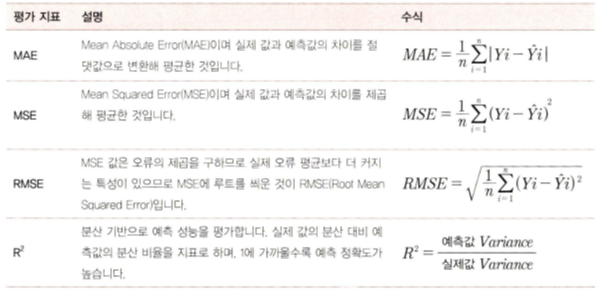

* scoring 파리미터 적용 값

    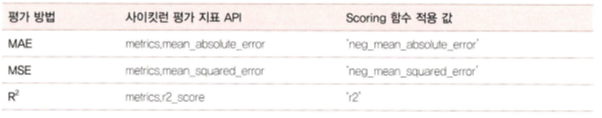

    -> 사이킷런의 scoring 함수는 score 값이 클수록 좋은 평과 결과로 자동 평가하는데, 회귀 평가 지표의 경우 값이 클수록 나쁜 모델이므로 scoring 함수에 -1을 곱해 음수로 보정한다.

    -> neg_mean_absolute_error = -1 * metrics.mean_absolute_error()



---

### **4-3. LinearRegression을 이용한 보스턴 주택 가격 회귀 구현**

* 피처에 대한 설명

    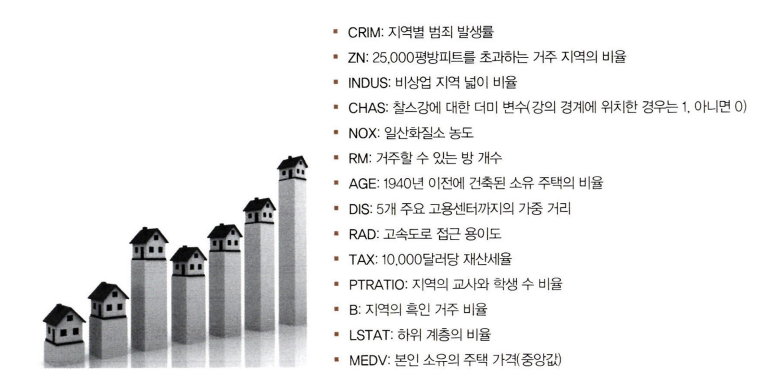

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
%matplotlib inline

# boston 데이터 세트 로드
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
boston = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :3]])

feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE']
bostonDF = pd.DataFrame(boston, columns=feature_names)
print('Boston 데이터 세트 크기:', bostonDF.shape)
bostonDF.head()

Boston 데이터 세트 크기: (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [9]:
bostonDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


>> Null 값은 없으며 모두 float형임

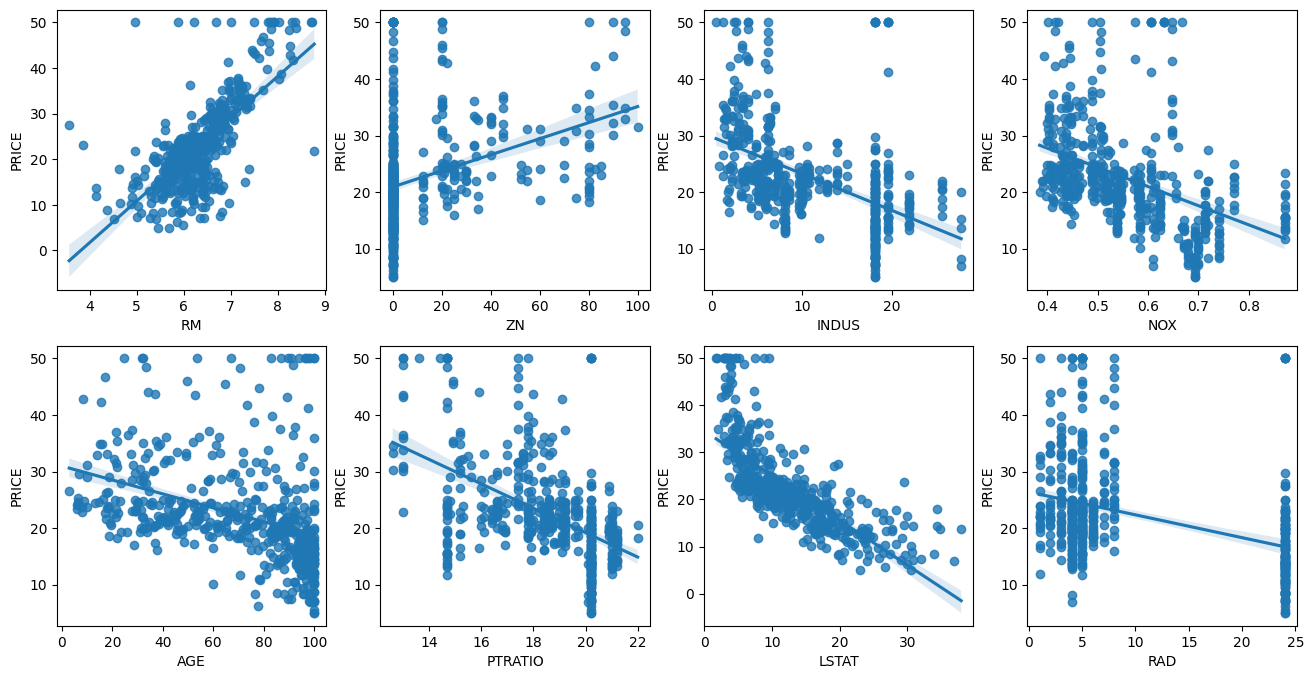

In [10]:
# 각 칼럼이 회귀 결과에 미치는 영향이 어느 정도인지 시각화해서 알아보기

# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4x2의 ax를 가짐.
fig, axs = plt.subplots(figsize=(16, 8), ncols=4, nrows=2)
lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature, y='PRICE', data=bostonDF, ax=axs[row][col])

>> RM과 LSTAT 칼럼의 영향도가 두드러지게 나타남

In [12]:
# LinearRegression 클래스롤 이용해 회귀 모델 만들기
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis =1, inplace=False)

X_train, X_test, y_train, y_test=train_test_split(X_data, y_target, test_size=0.3, random_state=156)

# 선형 회귀 OLS로 학습/예측/평가 수행
lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE :{1:.3F}'.format(mse, rmse))
print('Varance score : {0:.3f}'.format(r2_score(y_test, y_preds)))     

MSE : 17.297, RMSE :4.159
Varance score : 0.757


In [13]:
# 절편과 회귀 계수 값 확인
print('절편 값:', lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_, 1))

절편 값: 40.995595172164826
회귀 계수값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [14]:
# # 피처별 회귀 계수 값으로 다시 매핑하고, 높은 값 순으로 출력
coeff = pd.Series(data=np.round(lr.coef_,1), index=X_data.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

>> RM이 양의 값으로 회귀 계수가 가장 크며, NOX의 회귀 계수 - 값은 너무 커 보임

In [15]:
# 5개의 폴드 세트에서 cross_val_score()를 이용해 교차 검증으로 MSE와 RMSE를 측정
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)
lr = LinearRegression()

# cross_val_score()로 5 폴드 세트로 MSE를 구한 뒤 이를 기반으로 다시 RMSE 구함
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores) # -1을 곱함에 유의 
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring="net_mean_squared_error")로 변환된 값은 모두 음수
print('5 folds의 개별 Negative MSE scores:', np.round(neg_mse_scores,2))
print('5 folds의 개별 RMSE scores:', np.round(rmse_scores,2))
print('5 folds의 평균 RMSE: {0:.3f}'.format(avg_rmse))

5 folds의 개별 Negative MSE scores: [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds의 개별 RMSE scores: [3.53 5.1  5.75 8.99 5.77]
5 folds의 평균 RMSE: 5.829


>> 'neg_mean_square_error'을 지정하면 반환되는 수치 값은 음수임

>> 따라서 반환된 값에 다시 -1을 곱해야 양의 값인 원래 모델에서 계산된 MSE 값이 됨

>> 이렇게 다시 변환된 MSE 값에 sqrt()를 적용해 RMSE를 구함